# `Soundscapy` - Quick Start Guide

By Andrew Mitchell, Lecturer, University College London

## Background

`Soundscapy` is a python toolbox for analysing quantitative soundscape data. Urban soundscapes are typically assessed through surveys which ask respondents how they perceive the given soundscape. Particularly when collected following the technical specification ISO 12913, these surveys can constitute quantitative data about the soundscape perception. As proposed in *How to analyse and represent quantitative soundscape data* [(Mitchell, Aletta, & Kang, 2022)](https://asa.scitation.org/doi/full/10.1121/10.0009794), in order to describe the soundscape perception of a group or of a location, we should consider the distribution of responses. `Soundscapy`'s approach to soundscape analysis follows this approach and makes it simple to process soundscape data and visualise the distribution of responses. 

For more information on the theory underlying the assessments and forms of data collection, please see ISO 12913-Part 2, *The SSID Protocol* [(Mitchell, *et al.*, 2020)](https://www.mdpi.com/2076-3417/10/7/2397), and *How to analyse and represent quantitative soundscape data*.

## This Notebook

The purpose of this notebook is to give a brief overview of how `Soundscapy` works and how to quickly get started using it to analyse your own soundscape data. The example dataset used is *The International Soundscape Database (ISD)* (Mitchell, *et al.*, 2021), which is publicly available at [Zenodo](https://zenodo.org/record/6331810) and is free to use. `Soundscapy` expects data to follow the format used in the ISD, but can be adapted for similar datasets.

----------

## Installation

To install Soundscapy with `pip`:

```
pip install soundscapy
```

----

## Working with Data

### Loading and Validating Data

Let's start by importing Soundscapy and loading the International Soundscape Database (ISD):


In [ ]:
from soundscapy import setup_logging

setup_logging("WARNING")

In [2]:
# Import Soundscapy
import soundscapy as sspy
from soundscapy.databases import isd

# Load the ISD dataset
df = isd.load()
print(df.shape)

# Validate the dataset with ISD-custom checks
df, excl = isd.validate(df)
print(f"Valid samples: {df.shape[0]}, Excluded samples: {excl.shape[0]}")

(3589, 142)
Valid samples: 3533, Excluded samples: 56


### Calculating ISOPleasant and ISOEventful Coordinates

Next, we'll calculate the ISOCoordinate values:

In [3]:
df = sspy.surveys.add_iso_coords(df)
df[["ISOPleasant", "ISOEventful"]].head()

,ISOPleasant,ISOEventful
0,0.219670,-0.133883
1,-0.426777,0.530330
2,0.676777,-0.073223
3,0.603553,-0.146447
4,0.457107,-0.146447


`Soundscapy` expects the PAQ values to be Likert scale values ranging from 1 to 5 by default, as specified in ISO 12913 and the SSID Protocol. However, it is possible to use data which, although structured the same way, has a different range of values. For instance this could be a 7-point Likert scale, or a 0 to 100 scale. By passing these numbers both to `validate_dataset()` and `add_paq_coords()` as the `val_range`, `Soundscapy` will check that the data conforms to what is expected and will automatically scale the ISOCoordinates from -1 to +1 depending on the original value range. 

For example:

In [4]:
import pandas as pd

val_range = (0, 100)
sample_transform = {
    "RecordID": ["EX1", "EX2"],
    "pleasant": [40, 25],
    "vibrant": [45, 31],
    "eventful": [41, 54],
    "chaotic": [24, 56],
    "annoying": [8, 52],
    "monotonous": [31, 55],
    "uneventful": [37, 31],
    "calm": [40, 10],
}
sample_transform = pd.DataFrame().from_dict(sample_transform)
sample_transform = sspy.surveys.rename_paqs(sample_transform)
sample_transform = sspy.surveys.add_iso_coords(sample_transform, val_range=val_range)
sample_transform

,RecordID,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,ISOPleasant,ISOEventful
0,EX1,40,45,41,24,8,31,37,40,0.220416,0.010711
1,EX2,25,31,54,56,52,55,31,10,-0.316863,0.159706


### Filtering Data

`Soundscapy` includes methods for several filters that are normally needed within the ISD, such as filtering by `LocationID` or `SessionID`.

In [18]:
# Filter by location
camden_data = isd.select_location_ids(df, ["CamdenTown"])
print(f"Camden Town samples: {camden_data.shape[0]}")

# Filter by session
regent_data = isd.select_session_ids(df, ["RegentsParkJapan1"])
print(f"Regent's Park Japan session 1 samples: {regent_data.shape[0]}")

# Complex filtering using pandas query
women_over_50 = df.query("gen00 == 'Female' and age00 > 50")
print(f"Women over 50: {women_over_50.shape[0]}")

Camden Town samples: 105
Regent's Park Japan session 1 samples: 45
Women over 50: 133


All of these filters can also be chained together. So, for instance, to return surveys from women over 50 taken in Camden Town, we would do:

In [19]:
isd.select_location_ids(df, "CamdenTown").query("gen00 == 'Female' and age00 > 50")

,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,THD_THD_Max,THD_Min_Max,THD_Max_Max,THD_L5_Max,THD_L10_Max,THD_L50_Max,THD_L90_Max,THD_L95_Max,ISOPleasant,ISOEventful
58,CamdenTown,CamdenTown1,CT108,531,2019-05-02 12:10:52,2019-05-02 12:26:45,51.539124,-0.142624,eng,engISO2018,...,-2.12,-4.44,72.28,45.05,37.19,13.40,-1.88,-2.45,-1.464466e-01,0.146447
63,CamdenTown,CamdenTown1,CT111,533,2019-05-02 12:29:42,2019-05-02 12:58:56,51.539124,-0.142624,eng,engISO2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.142136e-01,-0.457107
104,CamdenTown,CamdenTown3,CT311,593,2019-05-20 12:24:14,2019-05-20 12:28:27,51.539124,-0.142624,eng,engISO2018,...,-4.73,-8.48,76.20,44.21,34.12,11.04,-4.83,-5.99,-1.464466e-01,0.146447
105,CamdenTown,CamdenTown3,CT311,623,2019-05-20 12:25:00,2019-05-20 12:30:00,51.539124,-0.142624,eng,engISO2018,...,-4.73,-8.48,76.20,44.21,34.12,11.04,-4.83,-5.99,1.338835e-01,0.073223
122,CamdenTown,CamdenTown3,CT324,609,2019-05-20 13:51:00,2019-05-20 13:57:00,51.539124,-0.142624,eng,engISO2018,...,-1.53,-9.57,75.83,43.30,33.73,11.88,-5.59,-7.44,1.767767e-01,0.926777
128,CamdenTown,CamdenTown3,CT328,617,2019-05-20 14:13:00,2019-05-20 14:16:00,51.539124,-0.142624,eng,engISO2018,...,-5.89,-1.76,71.56,45.97,38.80,17.59,2.64,1.16,-4.393398e-01,0.250000
132,CamdenTown,CamdenTown4,CT403,1220,2019-07-13 12:31:40,2019-07-13 12:35:30,51.539140,-0.142648,eng,engISO2018,...,-1.32,-3.24,71.78,49.81,42.16,16.53,0.54,-0.65,-4.598694e-17,0.603553


## Plotting

Soundscapy offers various plotting functions to visualize soundscape data. Let's explore some of them:

### Scatter plots


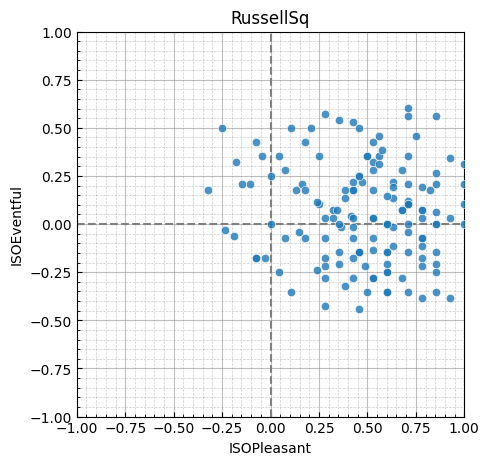

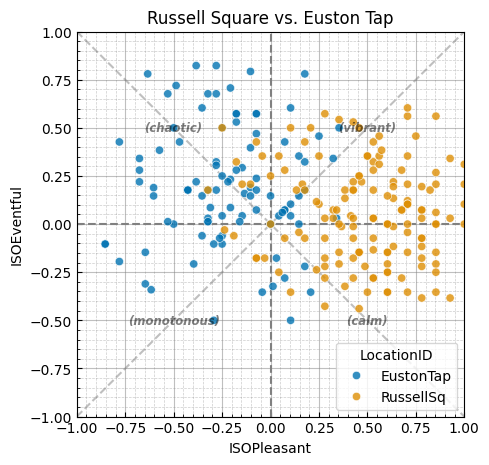

In [20]:
import matplotlib.pyplot as plt

from soundscapy.plotting import scatter_plot

# Basic scatter plot
ax = scatter_plot(isd.select_location_ids(df, ["RussellSq"]), title="RussellSq")
plt.show()

# Customized scatter plot with multiple locations
ax = scatter_plot(
    isd.select_location_ids(df, ["RussellSq", "EustonTap"]),
    hue="LocationID",
    title="Russell Square vs. Euston Tap",
    diagonal_lines=True,
    legend_location="lower right",
)
plt.show()

### Density plots

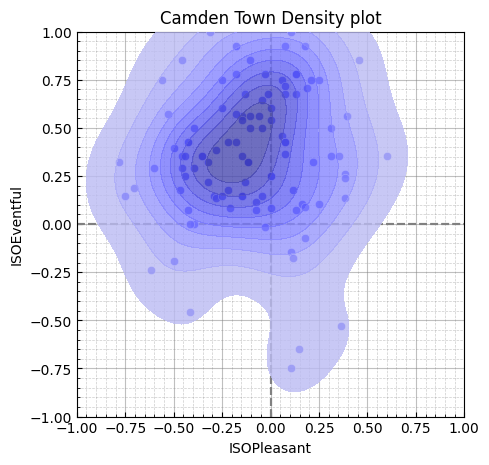

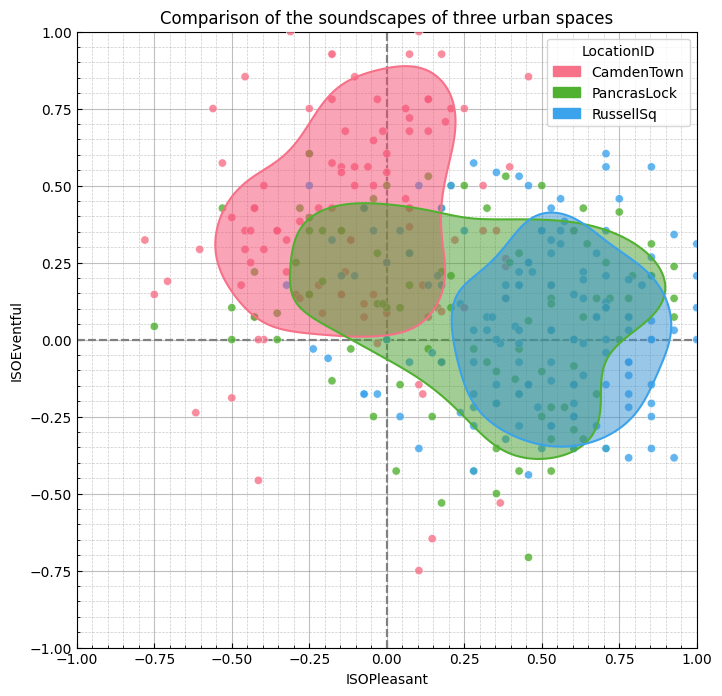

In [23]:
from soundscapy.plotting import density_plot

# Single density plot
density_plot(
    isd.select_location_ids(df, ["CamdenTown"]),
    title="Camden Town Density plot",
    legend=True,
    color="blue",
)
plt.show()

# Density comparisons with simple density lines
density_plot(
    isd.select_location_ids(df, ["CamdenTown", "RussellSq", "PancrasLock"]),
    hue="LocationID",
    title="Comparison of the soundscapes of three urban spaces",
    palette="husl",
    incl_outline=True,
    incl_scatter=True,
    figsize=(8, 8),
    simple_density=True,
)
plt.show()

### Jointplots


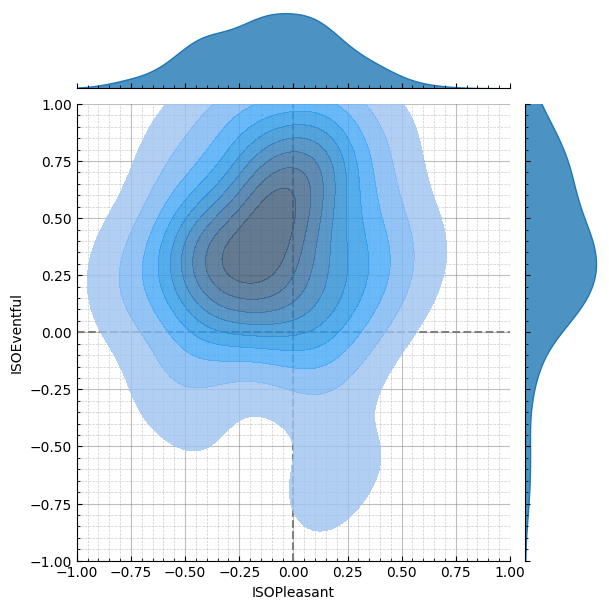

In [24]:
from soundscapy.plotting.circumplex_plot import Backend, CircumplexPlot

plot = CircumplexPlot(
    isd.select_location_ids(df, ["CamdenTown"]), backend=Backend.SEABORN
)
plot.jointplot()
plot.show()

r### Creating subplots

`Soundscapy` also provides a method for creating subplots of the circumplex. This is particularly useful when comparing multiple locations.

In [25]:
df["LocationID"].unique()

array(['CarloV', 'SanMarco', 'PlazaBibRambla', 'CamdenTown', 'EustonTap',
       'Noorderplantsoen', 'MarchmontGarden', 'MonumentoGaribaldi',
       'TateModern', 'PancrasLock', 'TorringtonSq', 'RegentsParkFields',
       'RegentsParkJapan', 'RussellSq', 'StPaulsCross', 'StPaulsRow',
       'CampoPrincipe', 'MiradorSanNicolas', 'LianhuashanParkEntrance',
       'LianhuashanParkForest', 'PingshanPark', 'PingshanStreet',
       'ZhongshanPark', 'OlympicSquare', 'ZhongshanSquare',
       'DadongSquare'], dtype=object)

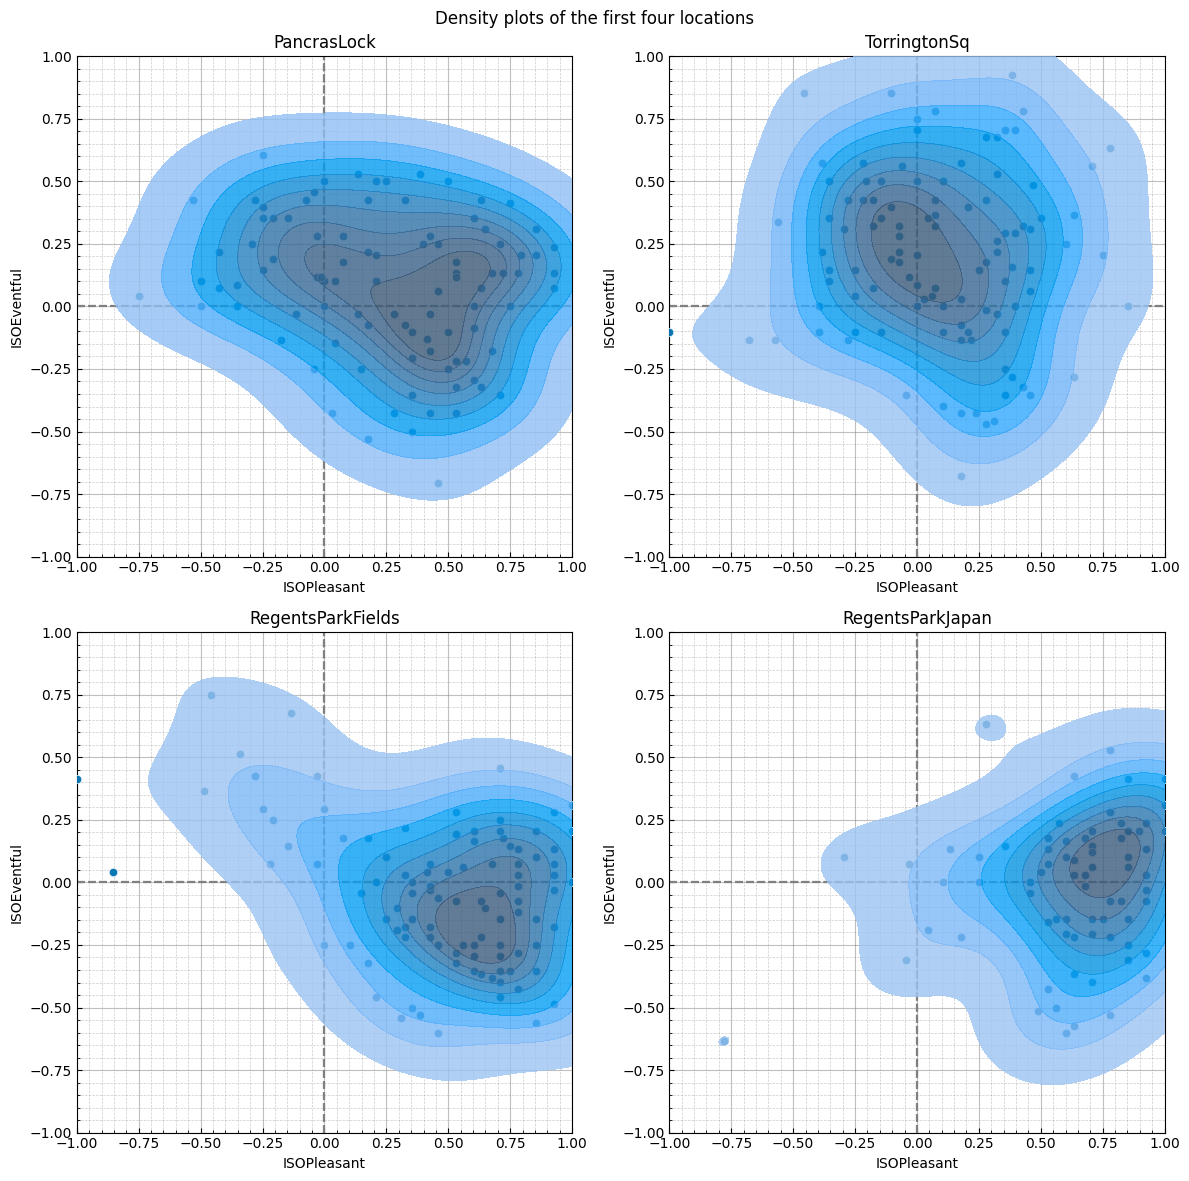

In [26]:
from soundscapy.plotting import create_circumplex_subplots

data_list = [
    sspy.isd.select_location_ids(df, loc) for loc in df["LocationID"].unique()[9:13]
]
fig = create_circumplex_subplots(
    data_list,
    plot_type="density",
    nrows=2,
    ncols=2,
    figsize=(12, 12),
    legend=True,
    incl_scatter=True,
    subtitles=[loc for loc in df["LocationID"].unique()[9:13]],
    title="Density plots of the first four locations",
)
plt.show()

You can also do this manually if you need more control, by creating a figure and axes and then plotting the density plots on the axes.

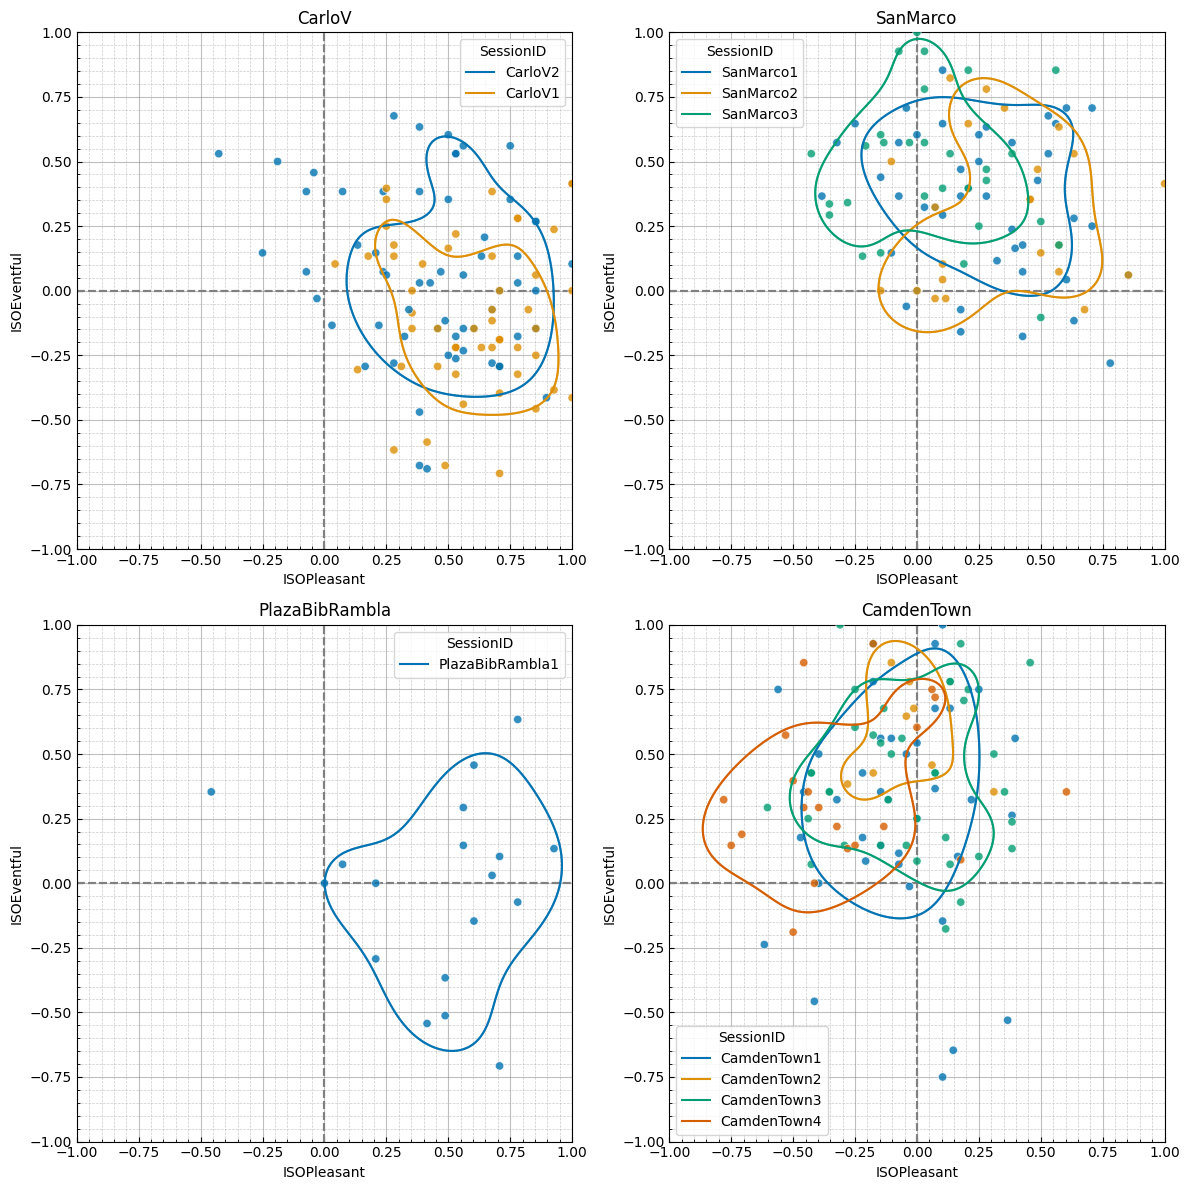

In [27]:
from soundscapy.plotting import density_plot

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for i, location in enumerate(df["LocationID"].unique()[:4]):
    density_plot(
        sspy.isd.select_location_ids(df, location),
        hue="SessionID",
        title=location,
        incl_outline=True,
        simple_density=True,
        fill=False,
        ax=axes.flatten()[i],
        legend=True,
    )

plt.tight_layout()
plt.show()

### Using Different Backends and advanced customisation

Soundscapy supports both Seaborn and Plotly (limited support at the moment) backends for plotting:

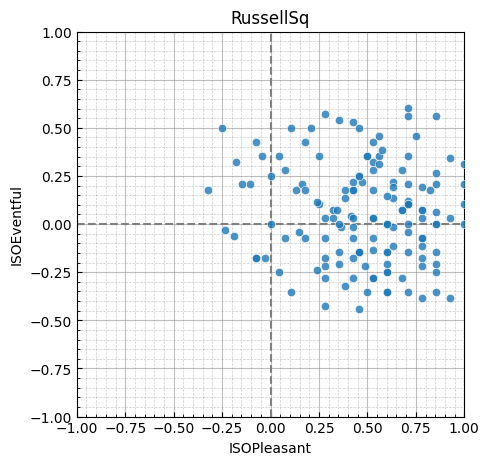

In [28]:
from soundscapy.plotting import Backend, CircumplexPlot, CircumplexPlotParams

# Seaborn backend (default)
seaborn_plot = CircumplexPlot(
    isd.select_location_ids(df, ["RussellSq"]),
    CircumplexPlotParams(title="RussellSq"),
    backend=Backend.SEABORN,
)
seaborn_plot.scatter(apply_styling=True).show()

In [33]:
# Plotly backend
plotly_plot = CircumplexPlot(
    isd.select_location_ids(df, ["RussellSq"]),
    CircumplexPlotParams(title="RussellSq"),
    backend=Backend.PLOTLY,
)
plotly_plot.scatter(apply_styling=True)
plotly_plot._plot.show(
    renderer="sphinx_gallery"
)  # sphinx-gallery renderer used for mkdocs purposes

/Users/mitch/Documents/GitHub/Soundscapy/src/soundscapy/plotting/backends.py:275: UserWarning:

PlotlyBackend is very experimental and not fully implemented.



### Using Adjusted Angles

In Aletta et. al. (2024), we propose a method for adjusting the angles of the circumplex to better represent the perceptual space. These adjusted angles are derived for each language separately, meaning that, once projected, the circumplex coordinates will be comparable across all languages. This ability and the derived angles have been incorporated into `Soundscapy`.

<Axes: title={'center': 'Soundscape Density Plot'}, xlabel='AdjustedPleasant', ylabel='AdjustedEventful'>

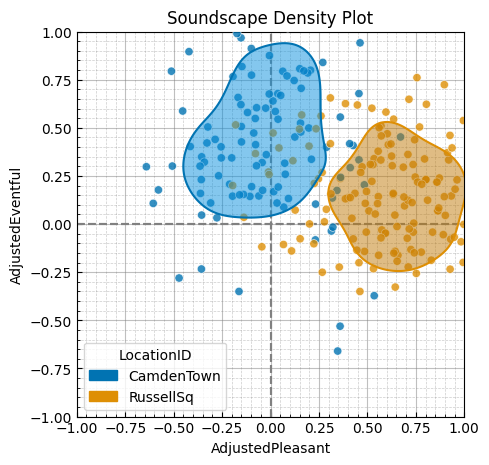

In [ ]:
from soundscapy.surveys import LANGUAGE_ANGLES

df = sspy.surveys.add_iso_coords(
    df,
    names=("AdjustedPleasant", "AdjustedEventful"),
    angles=LANGUAGE_ANGLES["eng"],
    overwrite=True,
)

density_plot(
    isd.select_location_ids(df, ["CamdenTown", "RussellSq"]),
    x="AdjustedPleasant",
    y="AdjustedEventful",
    hue="LocationID",
    incl_scatter=True,
    simple_density=True,
    incl_outline=True,
)